# **Studi Kasus 2**

## **Preparation Data**

Import libraries terlebih dahulu, sklearn.tree sebagai pembantu visualisasi, tidak digunakan untuk menghitung rumus regresi.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Lalu, import dataset yang akan dianalisa.

In [2]:
data = pd.read_csv('/Users/mac/Downloads/Student_Performance.csv')
data.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,2,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,2,8,5,66.0
5,3,78,2,9,6,61.0
6,7,73,1,5,6,63.0
7,8,45,1,4,6,42.0
8,5,77,2,8,2,61.0
9,4,89,2,4,0,69.0


## **Exploratory Data Analysis**

Periksa dataset, kolom, baris, nilai kosong, dan lain-lain sebelum terjun ke modelling.

In [3]:
print(data.info())
print(data.isnull().sum())
print(data.describe())
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB
None
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
       Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000  

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0
9999,7,74,2,8,1,64.0


Setelah kami cek, kami perbaiki dan setting sesuai kebutuhan analisa. Disini kami memperbaiki nilai yang hilang (jika ada) dengan nilai yang sesuai, dan mengubah tipe data float menjadi interger.

In [4]:
data = pd.DataFrame(data)
data[['Performance Index']] = data[['Performance Index']].fillna(0)  # Ganti 0 dengan nilai yang sesuai (bisa jadi nilai tengah / median)
data[['Performance Index']] = data[['Performance Index']].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Extracurricular Activities        10000 non-null  int64
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
 5   Performance Index                 10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


Lalu, cari korelasi yang paling sesuai untuk menemukan variabel agar dapat kami tentukan sebagai X dan Y.

<Axes: >

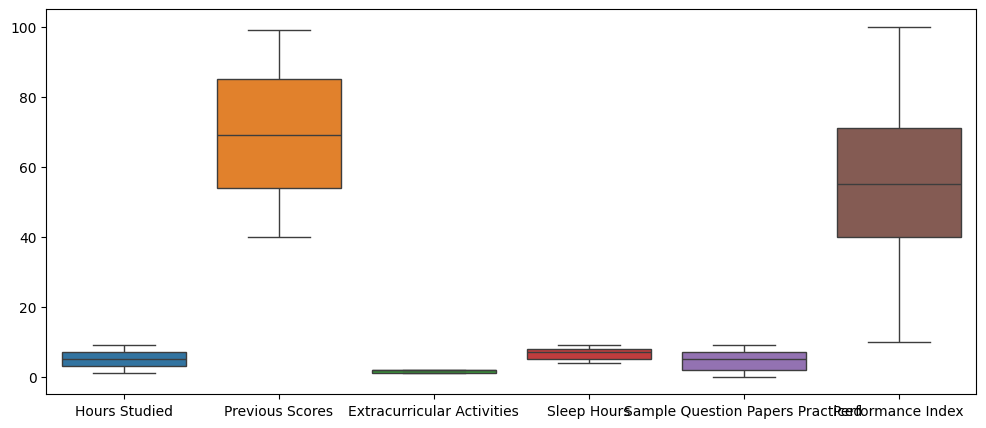

In [5]:
plt.figure(figsize=(12, 5))
sns.boxplot(data)

In [6]:
correlation_matrix = data.corr()
print(correlation_matrix)

                                  Hours Studied  Previous Scores  \
Hours Studied                          1.000000        -0.012390   
Previous Scores                       -0.012390         1.000000   
Extracurricular Activities            -0.003873        -0.008369   
Sleep Hours                            0.001245         0.005944   
Sample Question Papers Practiced       0.017463         0.007888   
Performance Index                      0.373730         0.915189   

                                  Extracurricular Activities  Sleep Hours  \
Hours Studied                                      -0.003873     0.001245   
Previous Scores                                    -0.008369     0.005944   
Extracurricular Activities                          1.000000     0.023284   
Sleep Hours                                         0.023284     1.000000   
Sample Question Papers Practiced                   -0.013103     0.003990   
Performance Index                                  -0.024525 

<Axes: >

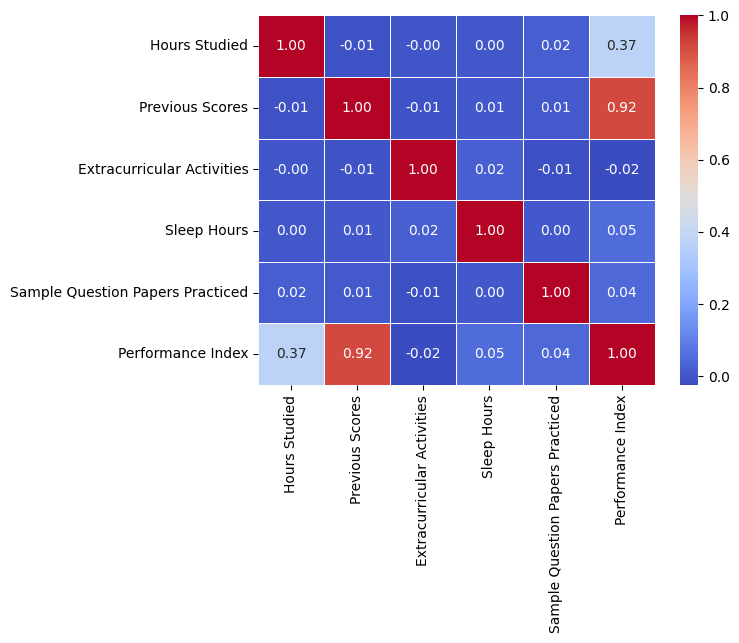

In [7]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

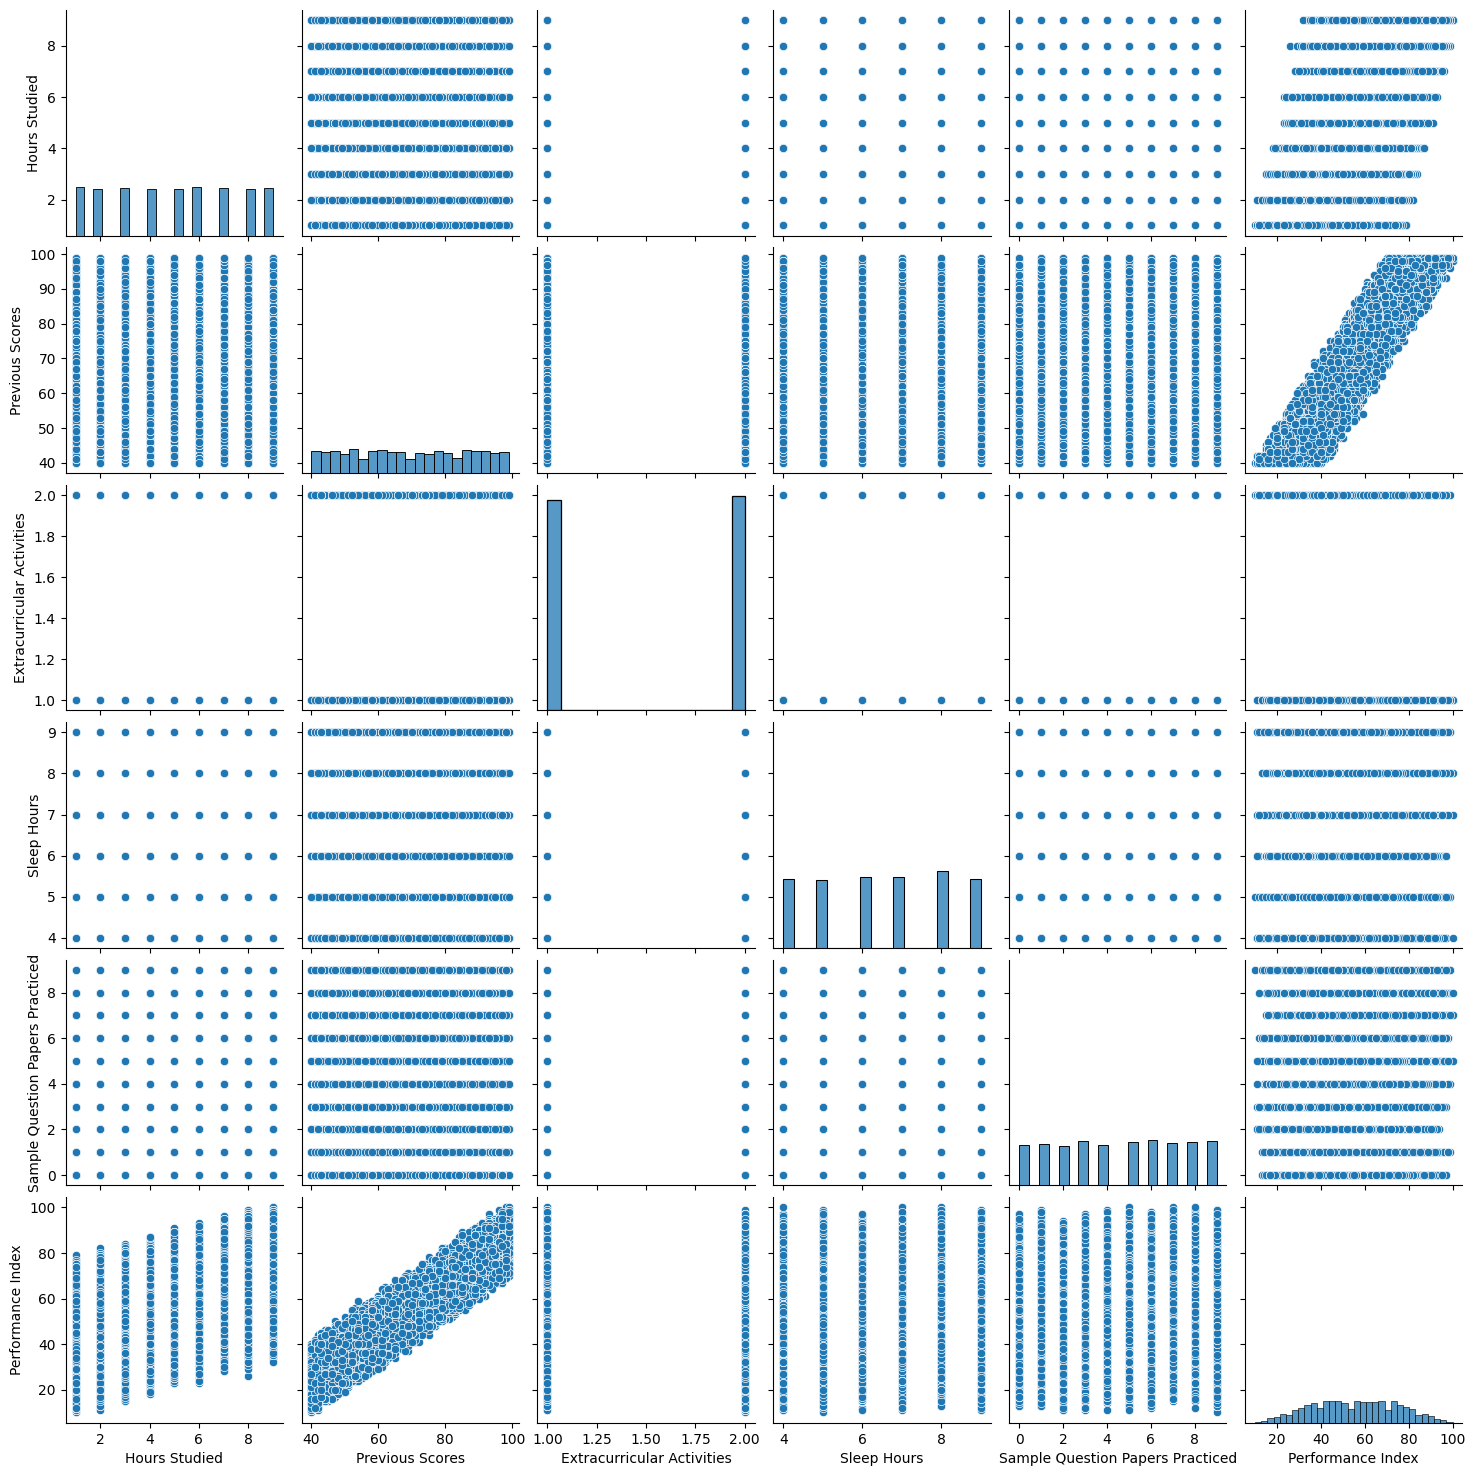

In [8]:
sns.pairplot(data)

## **Modelling**

**Polynomial Regression**

#### **Kode**

Deklarasikan variabel terlebih dahulu ke dalam code, dan lakukan penyesuaian terhadap kebutuhan yang diperlukan.

In [9]:
X = data['Previous Scores'].values
y = data['Performance Index'].values

In [19]:
# Standarisasi fitur
X_mean = np.mean(X)
X_std = np.std(X)
X_scaled = (X - X_mean) / X_std

In [20]:
# Membuat fitur polynomial degree 2
degree = 2
X_poly = np.column_stack([X_scaled**i for i in range(degree + 1)])

Lakukan training pada 80% data dan testing pada 20% data.

In [21]:
# Membagi data menjadi training dan testing (80%-20%)
train_size = int(0.8 * len(X_poly))
X_train, X_test = X_poly[:train_size], X_poly[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Deklarasikan variabel untuk mean.

In [22]:
# Melakukan regresi linear menggunakan least squares
coeffs = np.linalg.lstsq(X_train, y_train, rcond=None)[0]
y_pred_poly = np.dot(X_test, coeffs)

Lakukan regresi.

In [23]:
# DataFrame untuk hasil prediksi
df_poly = pd.DataFrame({
    'Previous Scores': data['Previous Scores'].iloc[train_size:].values,
    'Performance Index': y_test,
    'Predicted Performance Index': y_pred_poly
})
print(df_poly)

      Previous Scores  Performance Index  Predicted Performance Index
0                  50                 28                    35.436208
1                  48                 35                    33.398574
2                  77                 63                    62.866869
3                  86                 71                    71.978400
4                  83                 78                    68.943002
...               ...                ...                          ...
1995               49                 23                    34.417490
1996               64                 58                    49.677502
1997               83                 74                    68.943002
1998               97                 95                    83.092971
1999               74                 64                    59.826134

[2000 rows x 3 columns]


Jika ditampilkan dalam bentuk dataframe, akan tampak seperti ini.

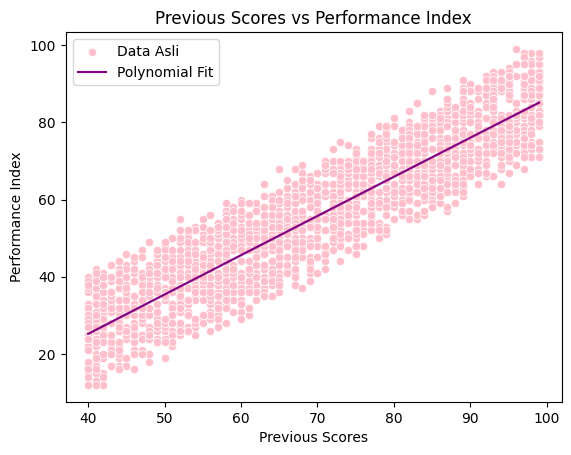

In [24]:
sns.scatterplot(x='Previous Scores', y='Performance Index', data=df_poly, color='pink', label='Data Asli')
sns.lineplot(x='Previous Scores', y='Predicted Performance Index', data=df_poly, color='purple', label='Polynomial Fit')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.legend()
plt.title('Previous Scores vs Performance Index')
plt.show()

#### **Visualisasi**

Berikut adalah visualisasi dari regresi yang kami lakukan.

### **Decision Tree**

#### **Kode**

Kode ini adalah implementasi decision tree untuk regresi.

In [61]:
import numpy as np

# Fungsi MSE untuk mengukur kesalahan
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Fungsi untuk memisahkan data berdasarkan threshold tertentu
def split_data(X, y, feature_idx, threshold, min_samples_split):
    left_mask = X[:, feature_idx] <= threshold
    right_mask = X[:, feature_idx] > threshold
    # Memastikan masing-masing sisi memiliki jumlah sampel yang cukup
    if np.sum(left_mask) < min_samples_split or np.sum(right_mask) < min_samples_split:
        return None, None
    return left_mask, right_mask

# Fungsi rekursif untuk membangun pohon keputusan
def build_tree(X, y, depth=0, max_depth=10, min_samples_split=5, min_samples_leaf=2):
    # Kondisi terminasi
    if depth >= max_depth or len(y) <= min_samples_leaf:
        return np.mean(y)

    best_mse = float('inf')
    best_split = None

    # Looping fitur untuk mencari split terbaik
    for feature_idx in range(X.shape[1]):
        thresholds = np.unique(X[:, feature_idx])
        for threshold in thresholds:
            left_mask, right_mask = split_data(X, y, feature_idx, threshold, min_samples_split)
            if left_mask is None or right_mask is None:
                continue

            # Menghitung MSE dari prediksi saat ini
            y_pred = np.concatenate([
                np.full(np.sum(left_mask), np.mean(y[left_mask])),
                np.full(np.sum(right_mask), np.mean(y[right_mask]))
            ])
            mse = calculate_mse(y, y_pred)

            # Memperbarui split terbaik jika mse lebih rendah
            if mse < best_mse:
                best_mse = mse
                best_split = (left_mask, right_mask, threshold, feature_idx)

    # Jika tidak ada split yang memenuhi syarat, kembalikan rata-rata
    if best_split is None:
        return np.mean(y)

    # Membagi data dan membuat cabang pohon
    left_tree = build_tree(X[best_split[0]], y[best_split[0]], depth + 1, max_depth, min_samples_split, min_samples_leaf)
    right_tree = build_tree(X[best_split[1]], y[best_split[1]], depth + 1, max_depth, min_samples_split, min_samples_leaf)

    # Mengembalikan node pohon
    return (best_split[3], best_split[2], left_tree, right_tree)

# Fungsi untuk membuat prediksi menggunakan pohon keputusan
def predict_tree(tree, X_row):
    if not isinstance(tree, tuple):
        return tree
    feature_idx, threshold, left_tree, right_tree = tree
    if X_row[feature_idx] <= threshold:
        return predict_tree(left_tree, X_row)
    else:
        return predict_tree(right_tree, X_row)

# Membangun pohon keputusan dengan parameter yang lebih dalam
tree = build_tree(X_train, y_train, max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Membuat prediksi menggunakan pohon keputusan
y_pred_tree = np.array([predict_tree(tree, row) for row in X_test])

# Menghitung MSE dari hasil prediksi
mse_tree = calculate_mse(y_test, y_pred_tree)
print("Mean Squared Error (MSE) dari Decision Tree:", mse_tree)

# Menampilkan hasil prediksi
print("Prediksi:", y_pred_tree[:5])
print("Nilai asli:", y_test[:5])

Mean Squared Error (MSE) dari Decision Tree: 63.38628717092586
Prediksi: [35.27368421 32.05925926 62.78518519 71.25581395 68.93150685]
Nilai asli: [28 35 63 71 78]


#### **Visualisasi**

Disini kami ada dua versi visulisasi untuk decision tree. Berikut adalah visualisasi menggunakan scatter plot, hanya menggunakan library Seaborn dan matplotlib.

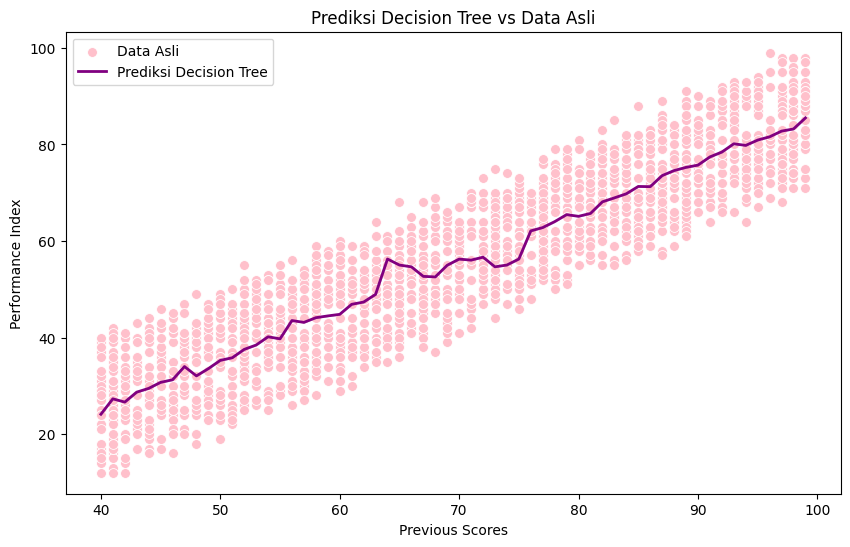

In [62]:
df_pred_tree = pd.DataFrame({
    'Previous Scores': data['Previous Scores'].iloc[train_size:].values,
    'Performance Index': y_test,
    'Predicted Performance Index': y_pred_tree
})

# Mengurutkan nilai agar line plot prediksi lebih rapi
df_pred_tree = df_pred_tree.sort_values(by='Previous Scores')

# Membuat scatter plot untuk data asli dan line plot untuk prediksi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Previous Scores', y='Performance Index', data=df_pred_tree, color='pink', label='Data Asli', s=50)
sns.lineplot(x='Previous Scores', y='Predicted Performance Index', data=df_pred_tree, color='purple', label='Prediksi Decision Tree', linewidth=2)

# Menambahkan label dan judul
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.legend()
plt.title('Prediksi Decision Tree vs Data Asli')
plt.show()

Dan berikut adalah visualisasi yang menggunakan library tambahan, yaitu sklearn.tree untuk membuat visualisasi menjadi serupa dengan pohon.

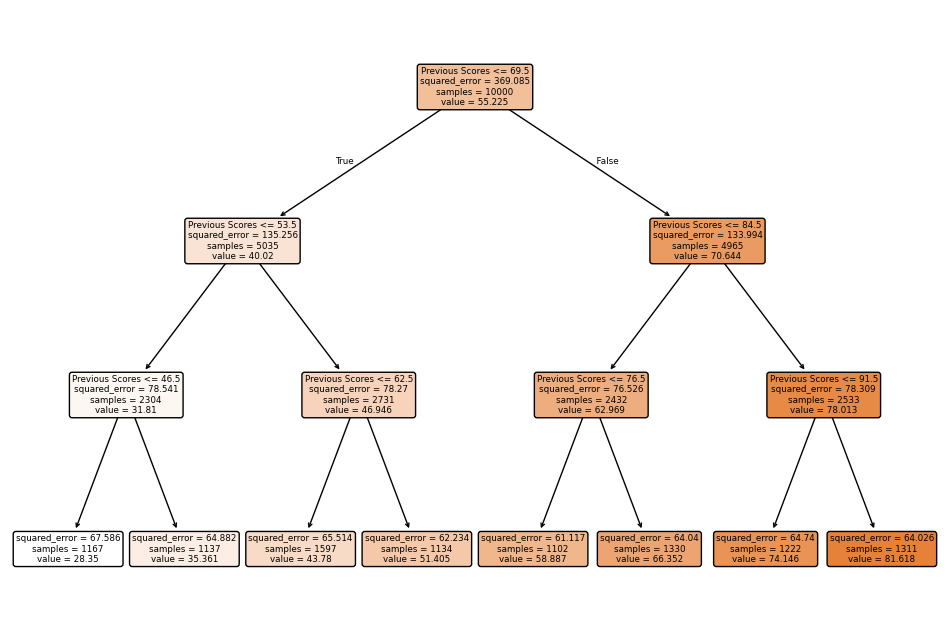

In [63]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Model Decision Tree
X = data['Previous Scores'].values.reshape(-1, 1)  # Reshape X to 2D
y = data['Performance Index'].values

tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X, y)

# Plot tree menggunakan sklearn
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=['Previous Scores'], rounded=True)
plt.show()

### **Random Forest**

#### **Kode**

Kode ini adalah implementasi random forest untuk regresi.

In [69]:
X = data['Previous Scores'].values.reshape(-1, 1)  # Reshape X to 2D
y = data['Performance Index'].values

# Membagi data menjadi training dan testing (80% latih, 20% uji)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Fungsi untuk Random Forest (Multiple Decision Trees)
def random_forest(X_train, y_train, n_estimators=10, max_depth=3):
    trees = []
    for _ in range(n_estimators):
        # Ambil subset acak dari data latih (bootstrap sampling)
        sample_idx = np.random.choice(len(X_train), len(X_train), replace=True)
        X_sample = X_train[sample_idx]
        y_sample = y_train[sample_idx]

        # Bangun pohon keputusan untuk setiap subset data
        tree = build_tree(X_sample, y_sample, max_depth=max_depth)
        trees.append(tree)
    return trees

# Prediksi dengan Random Forest
def predict_random_forest(trees, X_test):
    predictions = np.zeros((len(X_test), len(trees)))
    for i, tree in enumerate(trees):
        for j, row in enumerate(X_test):
            predictions[j, i] = predict_tree(tree, row)
    # Gabungkan prediksi dari setiap pohon (rata-rata untuk regresi)
    return np.mean(predictions, axis=1)

# Bangun Random Forest
trees = random_forest(X_train, y_train, n_estimators=35, max_depth=15)

# Prediksi dengan Random Forest
y_pred_forest = predict_random_forest(trees, X_test)

#### **Visualisasi**

Disini kami ada dua versi visulisasi untuk random forest. Berikut adalah visualisasi menggunakan scatter plot, hanya menggunakan library Seaborn dan matplotlib.

Length of X_test: 2000
Length of y_test: 2000
Length of y_pred_forest: 2000


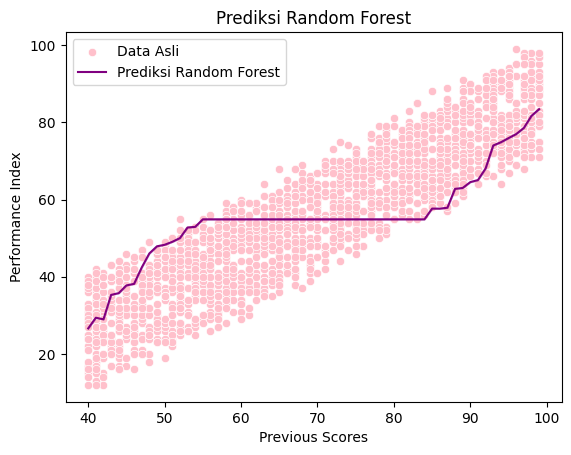

In [70]:
# Periksa panjang array
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred_forest: {len(y_pred_forest)}")

# Pastikan semua array memiliki panjang yang sama
min_length = min(len(X_test), len(y_test), len(y_pred_forest))

# Potong array jika perlu agar memiliki panjang yang sama
X_test_flattened = X_test.flatten()[:min_length] if len(X_test.shape) > 1 else X_test[:min_length]
y_test = y_test[:min_length]
y_pred_forest = y_pred_forest[:min_length]

# Buat DataFrame
df_pred_forest = pd.DataFrame({
    'Previous Scores': X_test_flattened,
    'Performance Index': y_test,
    'Predicted Performance Index': y_pred_forest
})

# Visualisasi
sns.scatterplot(x='Previous Scores', y='Performance Index', data=df_pred_forest, color='pink', label='Data Asli')
sns.lineplot(x='Previous Scores', y='Predicted Performance Index', data=df_pred_forest, color='purple', label='Prediksi Random Forest')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.legend()
plt.title('Prediksi Random Forest')
plt.show()


Dan berikut adalah visualisasi yang menggunakan library tambahan, yaitu sklearn.ensemble untuk membuat visualisasi menjadi serupa dengan pohon.

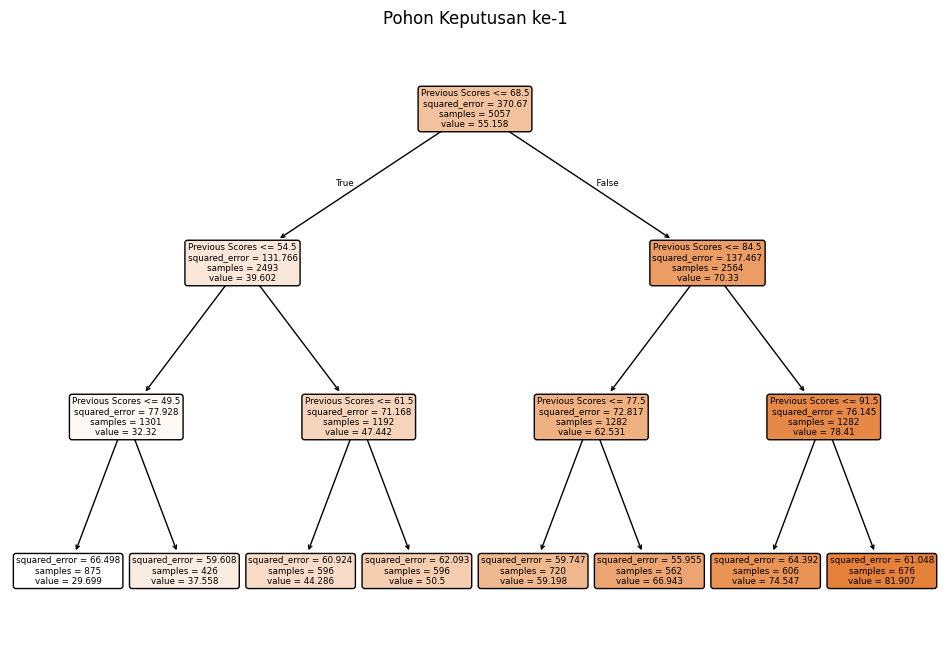

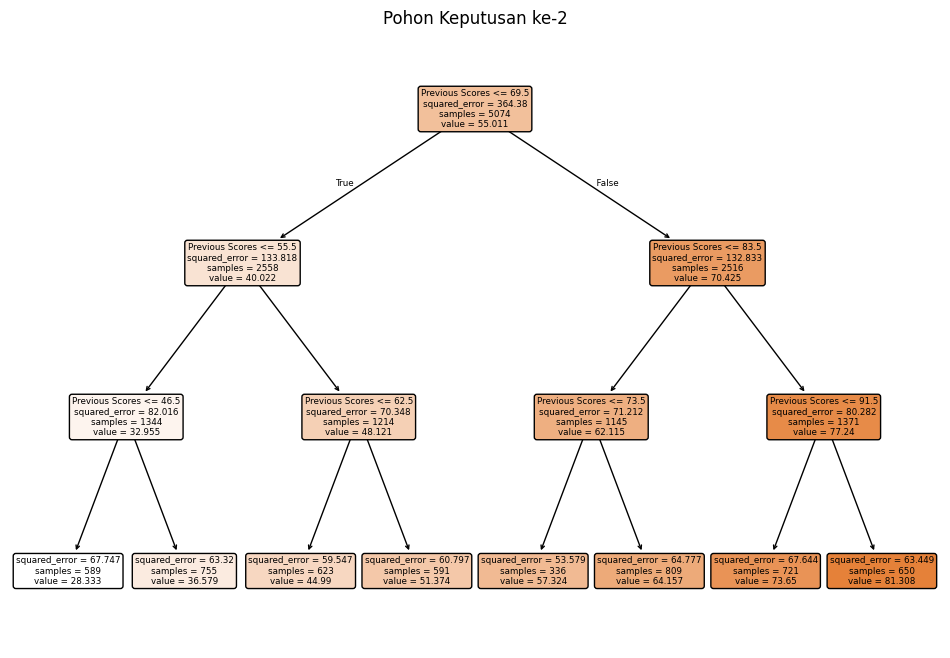

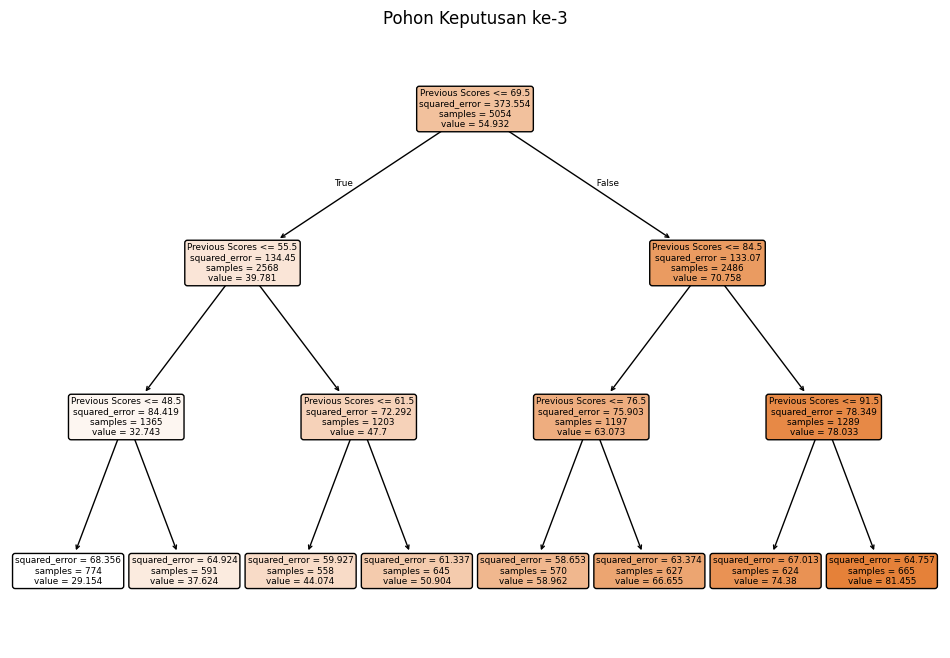

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Membuat model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# Cek jumlah fitur di X_train
num_features = X_train.shape[1]

# Tentukan nama fitur sesuai jumlahnya
if num_features == 1:
    feature_names = ['Previous Scores']
else:
    feature_names = [f'Feature {i+1}' for i in range(num_features)]

# Menampilkan 3 pohon pertama dari Random Forest
n_trees = 3  # Menampilkan 3 pohon pertama
for i in range(min(n_trees, len(rf_model.estimators_))):
    estimator = rf_model.estimators_[i]

    # Menampilkan pohon keputusan
    plt.figure(figsize=(12, 8))
    plot_tree(estimator, feature_names=feature_names, filled=True, rounded=True)
    plt.title(f'Pohon Keputusan ke-{i+1}')
    plt.show()

## **Evaluasi**

### **Polynomial Regression**

#### Mean Squared Error

Berikut Mean Squared Error dari Polynomial Regression yang kami lakukan, dengan m yang dideklarasikan sebagai jumlah data.

In [72]:
mse_poly = np.mean((y_test - y_pred_poly) ** 2)
print(f"Polynomial Regression - Mean Squared Error (MSE): {mse_poly}")

Polynomial Regression - Mean Squared Error (MSE): 60.67301820202725


#### Mean Absolute Error

Berikut Mean Absolute Error dari regresi kami.

In [73]:
mae_poly = np.mean(np.abs(y_test - y_pred_poly))
print(f"Polynomial Regression - Mean Absolute Error (MAE): {mae_poly}")

Polynomial Regression - Mean Absolute Error (MAE): 6.644246026935056


#### R Square

Berikut adalah seberapa besar akurasi dari regresi kami.

In [74]:
ss_res_poly = np.sum((y_test - y_pred_poly) ** 2)
ss_tot_poly = np.sum((y_test - np.mean(y_test)) ** 2)
r2_poly = 1 - (ss_res_poly / ss_tot_poly)
print(f"Polynomial Regression - R-squared: {r2_poly}")

Polynomial Regression - R-squared: 0.8338587169268311


#### Precision

Berikut adalah precision kami, dengan TP, FP, TN, FN, sebagai variabel yang akan digunakan untuk mencari precision, recall, dan F1 score.

In [75]:
# Tentukan nilai threshold
threshold = 0.5

# Mengonversi prediksi menjadi kelas dengan threshold
y_pred_poly_class = (y_pred_poly >= threshold).astype(int)
y_pred_tree_class = (y_pred_tree >= threshold).astype(int)
y_pred_rf_class = (y_pred_poly >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

# Hitung precision untuk Polynomial Regression
precision_poly = np.sum((y_pred_poly_class == 1) & (y_test_class == 1)) / np.sum(y_pred_poly_class == 1)
print(f"Polynomial Regression - Precision: {precision_poly}")

Polynomial Regression - Precision: 1.0


#### Recall

Berikut adalah recall dari regresi kami.

In [76]:
recall_poly = np.sum((y_pred_poly_class == 1) & (y_test_class == 1)) / np.sum(y_test_class == 1)
print(f"Polynomial Regression - Recall: {recall_poly}")

Polynomial Regression - Recall: 1.0


#### F1 Score

Berikut adalah F1 score dari regresi kami.

In [77]:
f1_poly = 2 * (precision_poly * recall_poly) / (precision_poly + recall_poly)
print(f"Polynomial Regression - F1 Score: {f1_poly}")

Polynomial Regression - F1 Score: 1.0


### **Decision Tree**

#### Mean Squared Error

Berikut Mean Squared Error dari Decision Tree yang kami buat, dengan m yang dideklarasikan sebagai jumlah data.

In [78]:
# Fungsi untuk menghitung MSE (Mean Squared Error)
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Contoh penggunaan (misal y_test adalah nilai sebenarnya, y_pred adalah hasil prediksi)
mse = calculate_mse(y_test, y_pred_tree)
print(f"MSE: {mse}")

MSE: 63.38628717092586


#### Mean Absolute Error

Berikut Mean Absolute Error dari tree kami.

In [79]:
# Fungsi untuk menghitung MAE (Mean Absolute Error)
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

mae = calculate_mae(y_test, y_pred_tree)
print(f"MAE: {mae}")

MAE: 6.750120197916971


#### R Square

Berikut adalah seberapa besar akurasi dari tree kami.

In [80]:
ss_res_tree = np.sum((y_test - y_pred_tree) ** 2)
ss_tot_tree = np.sum((y_test - np.mean(y_test)) ** 2)
r2_tree = 1 - (ss_res_tree / ss_tot_tree)
print(f"Polynomial Regression - R-squared: {r2_tree}")

Polynomial Regression - R-squared: 0.8264289565296408


#### Precision

Berikut adalah precision kami, dengan TP, FP, TN, FN, sebagai variabel yang akan digunakan untuk mencari precision, recall, dan F1 score.

Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1 Score: 0.8333333333333334
Confusion Matrix: {'True Positives (TP)': np.int64(5), 'True Negatives (TN)': np.int64(3), 'False Positives (FP)': np.int64(1), 'False Negatives (FN)': np.int64(1)}


#### Recall

Berikut adalah recall dari tree kami.

In [80]:
# Fungsi untuk menghitung Recall
def calculate_recall(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix_manual(y_true, y_pred)
    if TP + FN == 0:
        return 0  # Avoid division by zero
    return TP / (TP + FN)

recall = calculate_recall(y_true, y_pred)
print(f"Recall: {recall}")

NameError: name 'y_true' is not defined

#### F1 Score

Berikut adalah F1 score dari tree kami.

In [81]:
# Fungsi untuk menghitung F1 Score
def calculate_f1(y_true, y_pred):
    precision = calculate_precision(y_true, y_pred)
    recall = calculate_recall(y_true, y_pred)
    if precision + recall == 0:
        return 0  # Avoid division by zero
    return 2 * (precision * recall) / (precision + recall)

f1_score = calculate_f1(y_true, y_pred)
print(f"F1 Score: {f1_score}")

NameError: name 'y_true' is not defined

### **Random Forest**

#### Mean Squared Error

Berikut Mean Squared Error dari Random Forest yang kami buat, dengan m yang dideklarasikan sebagai jumlah data.

In [82]:
# Menghitung MSE, MAE, dan R-squared dari hasil prediksi Random Forest
mse = calculate_mse(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 141.09830054293042


#### Mean Absolute Error

Berikut Mean Absolute Error dari forest kami.

In [83]:
print(f"MAE: {mae}")
mae = calculate_mae(y_test, y_pred)

MAE: 9.684337561285249


#### R Square

Berikut adalah seberapa besar akurasi dari forest kami.

In [84]:
print(f"R-squared: {r2}")
r2 = calculate_r2(y_test, y_pred)

R-squared: 0.613629692632255


#### Precision

Berikut adalah precision kami, dengan TP, FP, TN, FN, sebagai variabel yang akan digunakan untuk mencari precision, recall, dan F1 score.

In [85]:
# Tentukan threshold untuk mengubah prediksi regresi menjadi klasifikasi biner
threshold = 0.5
y_pred_class = np.where(y_pred > threshold, 1, 0)
y_test_class = np.where(y_test > threshold, 1, 0)

# Fungsi untuk menghitung TP, TN, FP, FN
def confusion_matrix_manual(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

# Fungsi untuk menghitung Precision
def calculate_precision(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix_manual(y_true, y_pred)
    if TP + FP == 0:
        return 0  # Menghindari pembagian dengan nol
    return TP / (TP + FP)

precision = calculate_precision(y_test_class, y_pred_class)
print(f"Precision: {precision}")

Precision: 1.0


#### Recall

Berikut adalah recall dari forest kami.

In [86]:
# Fungsi untuk menghitung Recall
def calculate_recall(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix_manual(y_true, y_pred)
    if TP + FN == 0:
        return 0  # Menghindari pembagian dengan nol
    return TP / (TP + FN)

recall = calculate_recall(y_test_class, y_pred_class)
print(f"Recall: {recall}")

Recall: 1.0


#### F1 Square

Berikut adalah F1 score dari forest kami.

In [87]:
# Fungsi untuk menghitung F1 Score
def calculate_f1(y_true, y_pred):
    precision = calculate_precision(y_true, y_pred)
    recall = calculate_recall(y_true, y_pred)
    if precision + recall == 0:
        return 0  # Menghindari pembagian dengan nol
    return 2 * (precision * recall) / (precision + recall)

f1_score = calculate_f1(y_test_class, y_pred_class)
print(f"F1 Score: {f1_score}")

F1 Score: 1.0


## **Kesimpulan**

Dalam analisis yang dilakukan menggunakan regresi polynomial dan algoritma decision tree, beberapa kesimpulan dapat diambil:

**Polynomial Regression:**
Regresi polynomial mampu menangani data yang memiliki pola non-linear, memberikan hasil prediksi yang lebih akurat dibandingkan regresi linear sederhana untuk dataset dengan tren yang lebih kompleks. Namun, model ini juga lebih rentan terhadap overfitting jika derajat polinomial yang dipilih terlalu tinggi.

**Decision Tree:**
Algoritma decision tree bekerja dengan membagi dataset menjadi beberapa subset berdasarkan fitur yang memberikan informasi terbaik untuk prediksi. Metode ini cenderung mudah dipahami dan diinterpretasikan karena strukturnya menyerupai pohon keputusan. Namun, decision tree sering kali overfitting pada data training, terutama jika tidak diatur dengan parameter seperti depth yang sesuai.

**Random Forest:**
Random forest sebagai kumpulan dari beberapa decision tree memperbaiki masalah overfitting dari decision tree tunggal. Dengan melakukan averaging hasil dari banyak pohon, model ini memberikan prediksi yang lebih stabil dan akurat. Selain itu, random forest juga membantu mengatasi variabilitas dalam data dan lebih tahan terhadap noise.

Secara keseluruhan, setiap model memiliki kelebihan dan kekurangannya masing-masing. Pilihan algoritma yang tepat sangat bergantung pada kompleksitas data dan tujuan analisis yang ingin dicapai.

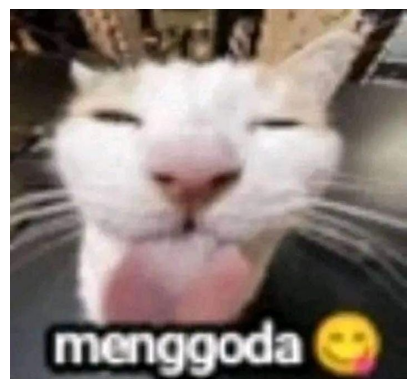

In [88]:
img = plt.imread('/Users/mac/Downloads/Uwoh sangat menggoda 😋😋😋😋.jpeg')

plt.imshow(img)
plt.axis('off')
plt.show()